In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/mar_16-20.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(186488, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-03-16,1239400894355120129,Indian govt temporarily suspends pilgrimage to...,[],0.0,{'country_code': 'in'},indian govt temporarily suspends pilgrimage ka...
1,2020-03-16,1239401191747932160,Wash those ‘hands’ Jha. They’re dirty for the ...,['CoronavirusOutbreak'],0.0,{'country_code': 'in'},wash hands jha dirty last years coronavirusout...
2,2020-03-16,1239401195942232064,I think it is time to announce stringent actio...,[],145.0,{'country_code': 'in'},think time announce stringent action including...
3,2020-03-16,1239401200241397760,So u agree it was an investment &amp; not a pr...,[],656.0,{'country_code': 'in'},u agree investment protest
4,2020-03-16,1239401233523208192,Corona caught alive at mumbai local.... https:...,[],1.0,{'country_code': 'in'},corona caught alive mumbai local


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
186483,2020-03-20,1240945244578828290,Don't let COVID-19 derail your IAS Preparation...,[],0.0,"{'country_code': 'in', 'state': 'Delhi'}",let covid derail ias preparation subscribe you...
186484,2020-03-20,1240922050916536320,Pope asking God to stop Corona virus is the Eu...,[],5.0,{'country_code': 'in'},pope asking god stop corona virus european ver...
186485,2020-03-20,1240950584984752128,Great. https://t.co/KykOR2sBNJ,[],1.0,{'country_code': 'in'},great
186486,2020-03-20,1240915663125762049,"We have come a long way ... From\n""Gaadi tera ...","['CoronaVirus', 'jantacurfew2020']",5.0,{'country_code': 'in'},come long way gaadi tera bhai chalayega corona...
186487,2020-03-20,1241048806432501766,"52,400 POUNDS of trash/plastic in just ONE wee...",[],18980.0,"{'country_code': 'in', 'state': 'Andhra Prade...",pounds trash plastic one week let sink


In [ ]:
print(df.shape)
df.isnull().sum()

(186488, 7)


date             0
id               0
text             0
hashtags         4
retweet_count    4
location         4
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    indian govt temporarily suspends pilgrimage ka...
1    wash hands jha dirty last years coronavirusout...
2    think time announce stringent action including...
3                           u agree investment protest
4                     corona caught alive mumbai local
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

186488


'indian govt temporarily suspends pilgrimage kartarpur sahib due covid threat'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

In [ ]:
t_clean[0]

['indian',
 'govt',
 'temporarily',
 'suspend',
 'pilgrimage',
 'kartarpur',
 'sahib',
 'due',
 'covid',
 'threat']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

indian


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

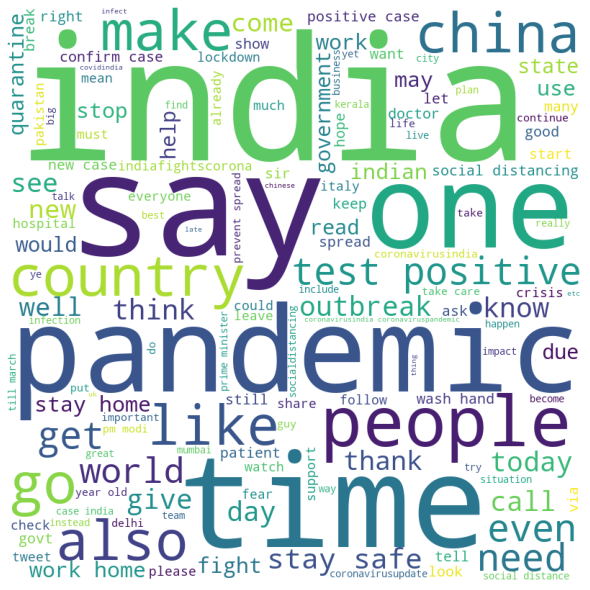

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['indian govt temporarily suspend pilgrimage kartarpur sahib due covid threat',
 'wash hand jha dirty last year coronavirusoutbreak',
 'think time announce stringent action include prison idiot put life thousand risk escape isolation isolate jail cell',
 'u agree investment protest',
 'corona catch alive mumbai local']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['across country',
 'across globe',
 'across india',
 'across state',
 'across world',
 'action plan',
 'action take',
 'active case',
 'active case total',
 'address nation',
 'address nation issue',
 'affected country',
 'air india',
 'alcohol base',
 'amid crisis',
 'amid fear',
 'amid outbreak',
 'amid pandemic',
 'amid scare',
 'amidst outbreak',
 'andhra pradesh',
 'anti caa',
 'appeal people',
 'around globe',
 'around world',
 'arvind kejriwal',
 'asia near',
 'ask people',
 'attend party',
 'avoid crowd',
 'avoid go',
 'avoid public',
 'avoid rumour',
 'avoid spread',
 'avoid touch',
 'awareness campaign',
 'awareness stay',
 'awareness stay hygienic',
 'baby doll',
 'back home',
 'ban entry',
 'bar restaurant',
 'best way',
 'big problem',
 'biological weapon',
 'ble pm',
 'bleach powder',
 'break chain',
 'break news',
 'bring back',
 'bring total',
 'caa npr',
 'caa nrc',
 'call chinese',
 'cancel due',
 'cancel train',
 'cancellation charge',
 'case active',
 'case active 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:confirm case,amid outbreak,th march,march pm,break chain,self isolation,health ministry,total confirm,total confirm case,please take\nTopic 1:social distance,prevent spread,live update,myth myths,myth myths fact,task force,amid pandemic,hon ble,maintain social,next week\nTopic 2:wash hand,coronavirusindia coronaviruspandemic,coronaviruspandemic coronaoutbreak,till march,precautionary measure,coronavirusindia coronaviruspandemic coronaoutbreak,coronavirusupdate coronavirusindia,attend party,fact jantacurfew,myths fact jantacurfew\nTopic 3:india coronavirusindia,global pandemic,preventive measure,shaheen bagh,coronavirusindia coronavirusupdate,around world,india coronavirusindia coronaviruspandemic,coronavirusoutbreakindia india coronavirusindia,jantacurfew coronavirusoutbreakindia india,take action\nTopic 4:social distancing,pm modi,address nation,year old,janata curfew,namo app,via namo,via namo app,coronavirusoutbreakindia india,first case\nTopic 5:test positive,nd march,kani

In [ ]:
lda.perplexity(tf)

684.1440443415851

In [ ]:
f=open('lda_mar_16_20.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_mar_16_20.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_mar_16_20.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_mar_16_20.pk')
shutil.move("topics_mar_16_20.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_mar_16_20.txt')